# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [18]:
# Implementacion del metodo de busqueda por amplitud

def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }
    
    
    init_state = 'Guayaquil'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato']


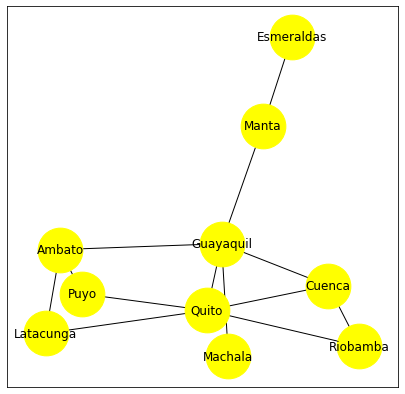

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(connections)
for key, lista in connections.items():
    for i in lista:
        G.add_edge(key,i)
plt.figure(3,figsize=(7,7)) 
nx.draw_networkx(G, with_label = True, node_size=2000,node_color='yellow')
plt.show()

# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

In [ ]:
# Agregar la solucion en markdown (Informe)
#n= es el numero de nodos
#d= profundidad
#b= factor de ramificacion
#n=(b^(d+1)-1)/(b-1)=formula
n=4
d=2
b = 1.30

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

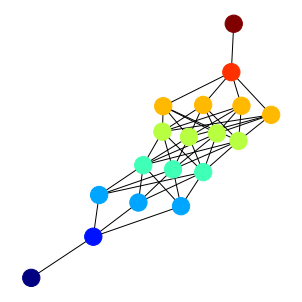

In [40]:
# Implementar
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from(
    [('Casa', 'Carlos Elizalde'),
     ('Carlos Elizalde', 'UNIREAS'), ('Carlos Elizalde', 'Cisneros'), ('Carlos Elizalde', 'Humanitaria'),
     ('UNIREAS', 'Monte Sinai'), ('UNIREAS', 'Santa Ines'), ('UNIREAS', 'Latino'),
     ('Cisneros', 'Monte Sinai'), ('Cisneros', 'Santa Ines'),('Cisneros', 'Latino'),
     ('Humanitaria','Monte Sinai'),('Humanitaria','Santa Ines'),('Humanitaria','Latino'),
     ('Monte Sinai','Odontologico'),('Monte Sinai','San Juan De Dios'),('Monte Sinai','Bolivar'),('Monte Sinai','San Martin de Porres'),
     ('Santa Ines','Odontologico'),('Santa Ines','San Juan De Dios'),('Santa Ines','Bolivar'),('Santa Ines','San Martin de Porres'),
     ('Latino','Odontologico'),('Latino','San Juan De Dios'),('Latino','Bolivar'),('Latino','San Martin de Porres'),
     ('Odontologico','Vicente Corral Moscoso'),('Odontologico','IESS'),('Odontologico','San Blas'),('Odontologico','Universitario Catolico'),
     ('San Juan De Dios','Vicente Corral Moscoso'),('San Juan De Dios','IESS'),('San Juan De Dios','San Blas'),('San Juan De Dios','Universitario Catolico'),
     ('Bolivar','Vicente Corral Moscoso'),('Bolivar','IESS'),('Bolivar','San Blas'),('Bolivar','Universitario Catolico'),
     ('San Martin de Porres','Vicente Corral Moscoso'),('San Martin de Porres','IESS'),('San Martin de Porres','San Blas'),('San Martin de Porres','Universitario Catolico'),
     ('Vicente Corral Moscoso','Regional Jose Carrasco Arteaga'),
     ('IESS','Regional Jose Carrasco Arteaga'),
     ('San Blas','Regional Jose Carrasco Arteaga'),
     ('Universitario Catolico','Regional Jose Carrasco Arteaga'),
     ('Regional Jose Carrasco Arteaga','Universitario Del Rio')
     ])
val_map = {'Casa': 0.0,
        'Carlos Elizalde': 1.0,
        'UNIREAS': 2.0,
        'Cisneros': 2.0,
        'Humanitaria': 2.0,
        'Monte Sinai': 3.0,
        'Santa Ines': 3.0,
        'Latino': 3.0,
        'Odontologico': 4.0,
        'San Juan De Dios': 4.0,
        'Bolivar': 4.0,
        'San Martin de Porres': 4.0,
        'Vicente Corral Moscoso': 5.0,
        'IESS': 5.0,
        'San Blas': 5.0,
        'Universitario Catolico': 5.0,
        'Regional Jose Carrasco Arteaga': 6.0,
        'Universitario Del Rio': 7.0
        }

plt.figure(3,figsize=(4,4)) 
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values,with_label = values)
plt.show()

# Conclusiones

#Algoritmo de amplitud
#El algoritmo nos permite encontrar todos los nodos hijos hasta llegar a la solucion mas optima
#Siempre partira de un nodo raiz